# Exercise 2

In [9]:
# Setup
%matplotlib inline

import pandas as pd
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt
import seaborn as sns

## Section 2.5

### Basic Data Setup

In [2]:
N = 40

In [3]:
# Data Setup
x = np.random.uniform(low=0., high=1., size=N)
y = x ** 2 + np.random.standard_normal(size=N)

#### PR Dataset

In [4]:
dataset = pr.gendatr(x[:, None], y[:, None])

<AxesSubplot:>

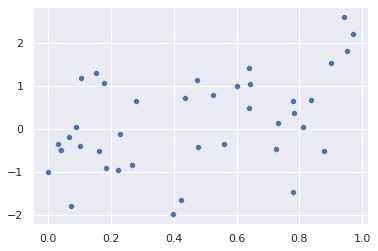

In [5]:
sns.set_theme()
sns.scatterplot(x=x, y=y)

### Lets see some regression plots for $N = 40$

In [6]:
y_hats = [pr.linearr(dataset, i) for i in range(0, 4)]

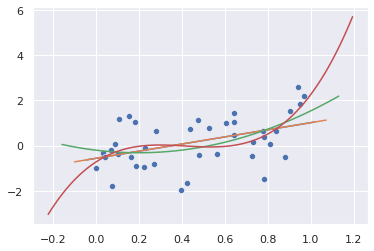

In [7]:
sns.scatterplot(x=x, y=y)
[pr.plotr(y_hats[i]) for i in range(0, len(y_hats))];